#Постанова задачи

Требуется изучить факторы, влияющие на качество усвоения иностранных языков на основе имеющихся данных.

Для этого необходимо:
1. Построить признаки эффективности усвоения языка человеком (от простых, например, качества сдачи экзамена до может чего еще);
2. Строить гипотезы зависимостей и оценивать статзначимость корреляций.

#Загрузка библиотек

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno
from scipy.stats import skew, kurtosis as kurt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro
from scipy.stats import kstest
import plotly.express as px
import scipy. stats as stats


import warnings
warnings.filterwarnings("ignore")

#Чтение данных

Этот набор данных содержит подробную информацию о взрослых, изучающих язык в Нидерландах, включая:
1. L1: Родной язык участника. (String)
2. C: Страна происхождения участника. (String)
3. L1L2: Лингвистическое сходство между родным языком и изучаемым языком. (Integer)
4. L2: Второй язык. (String)
5. AaA: Возраст на момент прибытия в Нидерланды. (Integer)
6. LoR: Продолжительность проживания в Нидерландах. (Integer)
7. Edu.day: Дни формального обучения на изучаемом языке. (Integer)
8. Sex: Пол участника. (String)
9. Family: Семейное положение участника. (String)
10. ISO639.3: ISO 639-3 коды для целевого языка. (String)
11. Enroll: Продолжительность обучения на языковых курсах. (Integer)
12. Speaking: Результат теста на знание разговорного языка на государственном экзамене по голландскому языку как второму. (Integer)
13. morph: Морфологическая оценка, связанная со структурами знаний внутри слов. (Integer)
14. lex: Оценка словарного запаса, указывающая на понимание написанных слов. (Integer)
15. new_feat: Оценка характеристик, отражающая способность усваивать новые звуки/ грамматические структуры. (Integer)
16. new_sounds: Оценка произношения звуковых символов. (Integer)

Будем исследовать, как различные параметры влияют на говорение, знание лексики, грамматики, на усвоение нового материала.

In [108]:
df = pd.read_csv('/content/stex.csv', encoding='latin-1')
df

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Female,Indo-European,afr,93,496,NaN,0.010463,NaN,NaN
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Male,Indo-European,afr,93,542,NaN,0.010463,NaN,NaN
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Female,Indo-European,afr,93,585,NaN,0.010463,NaN,NaN
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Female,Indo-European,afr,93,521,NaN,0.010463,NaN,NaN
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Female,Indo-European,afr,93,639,NaN,0.010463,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50230,Yoruba,Nigeria,YorubaEnglish,English,29,8,3.0,Male,Niger-Congo,yor,35,514,0.2162,0.595079,25.0,22.0
50231,Yoruba,Nigeria,YorubaEnglish,English,28,2,4.0,Female,Niger-Congo,yor,35,505,0.2162,0.595079,25.0,22.0
50232,Yoruba,Nigeria,YorubaEnglish,English,27,12,3.0,Female,Niger-Congo,yor,35,502,0.2162,0.595079,25.0,22.0
50233,Yoruba,Nigeria,YorubaEnglish,English,26,2,3.0,Male,Niger-Congo,yor,35,426,0.2162,0.595079,25.0,22.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50235 entries, 0 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          50235 non-null  object 
 1   C           50235 non-null  object 
 2   L1L2        50235 non-null  object 
 3   L2          50235 non-null  object 
 4   AaA         50235 non-null  int64  
 5   LoR         50235 non-null  int64  
 6   Edu.day     50226 non-null  float64
 7   Sex         50235 non-null  object 
 8   Family      50235 non-null  object 
 9   ISO639.3    50235 non-null  object 
 10  Enroll      50235 non-null  int64  
 11  Speaking    50235 non-null  int64  
 12  morph       48426 non-null  float64
 13  lex         50235 non-null  float64
 14  new_feat    48219 non-null  float64
 15  new_sounds  48219 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.1+ MB


#Предобработка данных

In [110]:
df.isna().sum()

L1               0
C                0
L1L2             0
L2               0
AaA              0
LoR              0
Edu.day          9
Sex              0
Family           0
ISO639.3         0
Enroll           0
Speaking         0
morph         1809
lex              0
new_feat      2016
new_sounds    2016
dtype: int64

In [111]:
df.dropna(inplace=True)
df.isna().sum()

L1            0
C             0
L1L2          0
L2            0
AaA           0
LoR           0
Edu.day       0
Sex           0
Family        0
ISO639.3      0
Enroll        0
Speaking      0
morph         0
lex           0
new_feat      0
new_sounds    0
dtype: int64

#Визуализация данных

Посмотрим, в каких регионах родилось большинство испытуемых.

In [11]:
# Count the occurrences of countries
country_counts = df['C'].value_counts()

# Reset index to convert the value_counts() series to a DataFrame
country_counts = country_counts.reset_index()

# Rename the columns
country_counts.columns = ['Country', 'Count']

# Sort the counts in descending order
country_counts = country_counts.sort_values('Count', ascending=False)
# Select the top 25 countries
top_25_countries = country_counts.head(25)

In [14]:
fig = px.bar(top_25_countries, x='Country', y='Count', labels={'Count': 'Count'}, title='Country Counts - Top 25 Countries')

fig.update_traces(marker_color='steelblue')

fig.show()

Рассмотрим самые популярные родные языки участников.

In [15]:
language_counts = df['L1'].value_counts()

language_counts = language_counts.reset_index()

language_counts.columns = ['Language', 'Count']

language_counts = language_counts.sort_values('Count', ascending=False)

In [16]:
top_25_languages = language_counts.head(25)

In [17]:
fig = px.bar(top_25_languages, x='Language', y='Count', labels={'Count': 'Count'}, title='First Language Counts - Top 25 Languages')

fig.update_traces(marker_color='steelblue')

fig.show()

Рассмотрим, какое количество людей разных возрастных категорий имеется.

In [18]:
aaa_counts = df['AaA'].value_counts()

aaa_counts = aaa_counts.reset_index()

aaa_counts.columns = ['Age of Arrival', 'Count']

aaa_counts = aaa_counts.sort_values('Count', ascending=False)

In [19]:
fig = px.bar(aaa_counts, x='Age of Arrival', y='Count', labels={'Count': 'Count'}, title='Age of Arrival Counts')

fig.update_traces(marker_color='steelblue')

fig.show()

#Анализ данных

##Построение корреляционных матриц

Посмотрим, как влияет время пребывания в стране и обучение на курсах на качество знания языка.

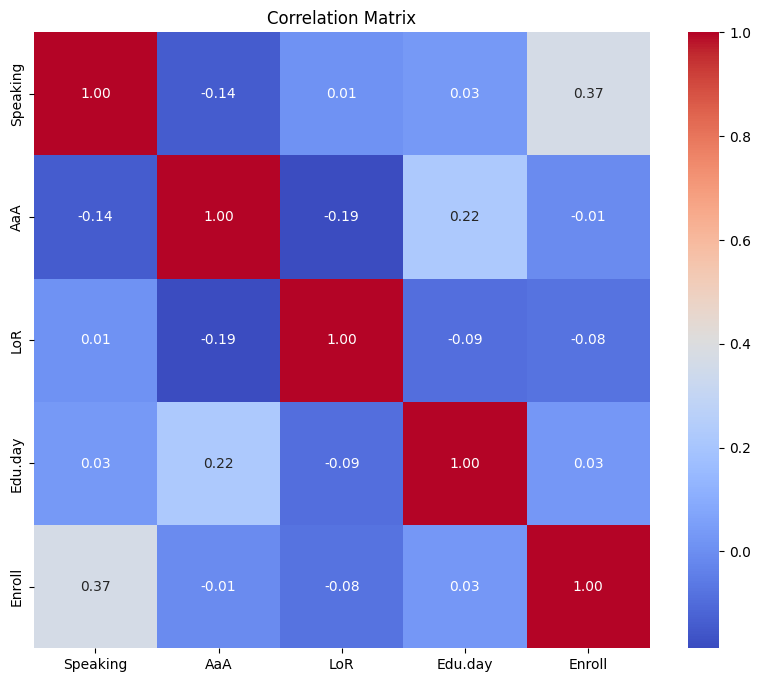

In [22]:
variables = ['Speaking', 'AaA', 'LoR', 'Edu.day', 'Enroll']

correlation_matrix = df[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

1. Для выработки навыка говорения важно обучаться на курсах, чем больше учишься, тем лучше навык.
2. Чем старше человек, который решил изучать язык, тем больше времени ему требуется на освоение. это связано с возрастными особенностями человека.

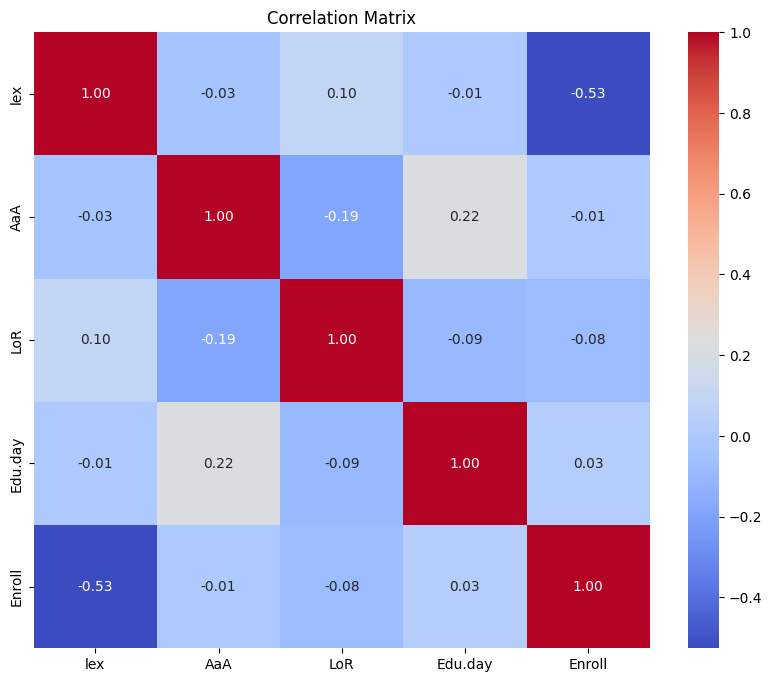

In [24]:
variables = ['lex', 'AaA', 'LoR', 'Edu.day', 'Enroll']

correlation_matrix = df[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

1. Для качественного знания лексики важен не возраст прибытия, а время пребывания. Это связано с тем, что разговорные навыки вырабатываются в процессе общения, которое происходит ежедневно.
2. Странно, что продолжительность обучения на курсах негативно влияет на знание лексики.

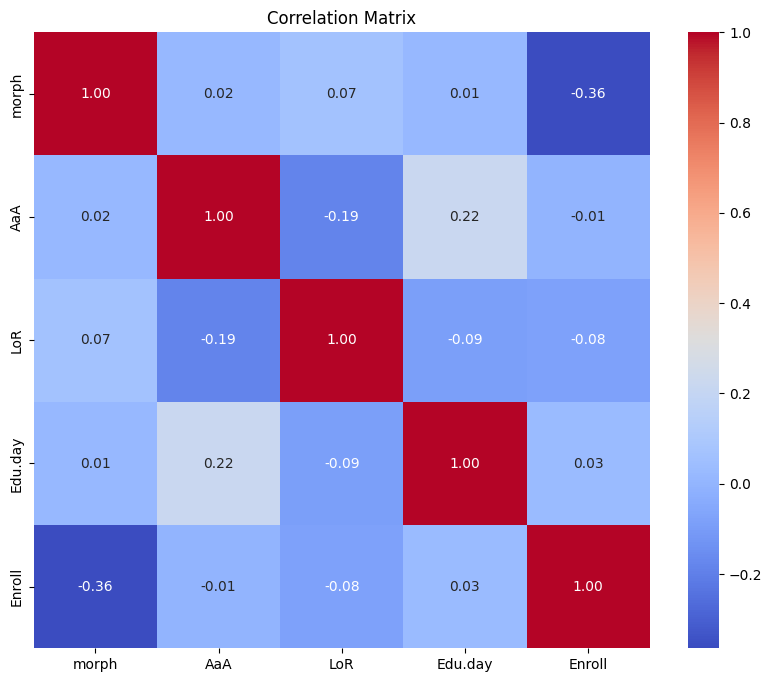

In [25]:
variables = ['morph', 'AaA', 'LoR', 'Edu.day', 'Enroll']

correlation_matrix = df[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

Можем сделать те же выводы, что и про лексику.

Рассмотрим влияние продолжительности обучения на знание лексики и морфологии.

<Axes: xlabel='Enroll', ylabel='lex'>

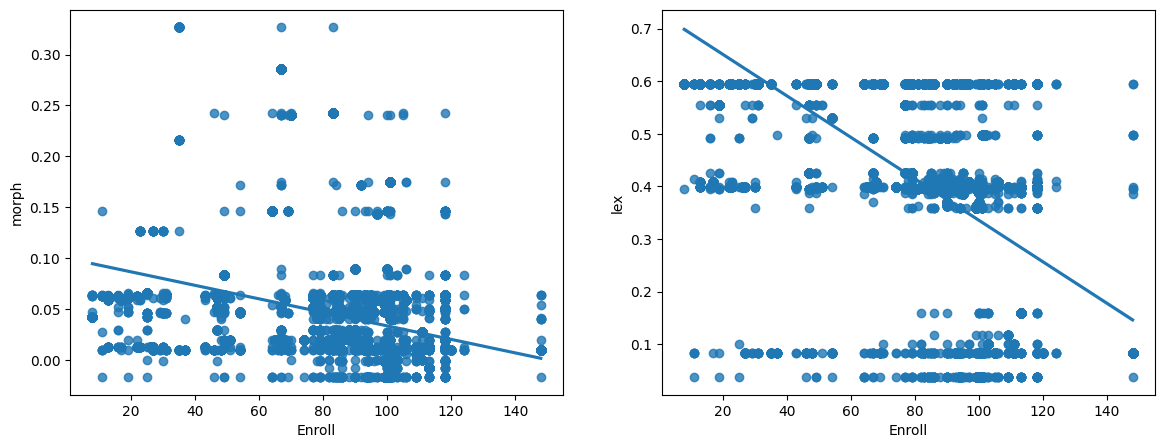

In [27]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.regplot(x='Enroll',y = 'morph',data = df, fit_reg=True, ax=ax1)
sns.regplot(x='Enroll',y = 'lex',data = df, fit_reg=True, ax=ax2)

1. Отрицательная корреляция не наблюдается.
2. Для того, чтобы правильно связать эти параметры, требуется знать, какие были перерывы между обучением на курсах. Так, например, человек, который проходил курсы регулярно в течении нескольких лет должен имет более высокие показатели лексики и морфем, чем человек, у которого были большие перерывы между курсами.

##Исследования

Кому легче осваивать новые языки: тем, кто знает только один язык, или тем, кто знает больше одного языка?

In [67]:
monoling = df[df.L2 == 'Monolingual']
not_monoling = df[df.L2 != 'Monolingual']

monoling.drop(columns=['L1', 'C', 'L1L2', 'L2', 'Family', 'ISO639.3', 'Sex'], inplace=True)
not_monoling.drop(columns=['L1', 'C', 'L1L2', 'L2', 'Family', 'ISO639.3', 'Sex'], inplace=True)
monoling.median(), not_monoling.median()


(AaA            25.000000
 LoR             3.000000
 Edu.day         3.000000
 Enroll         85.000000
 Speaking      510.000000
 morph           0.050000
 lex             0.398649
 new_feat       11.000000
 new_sounds     20.000000
 dtype: float64,
 AaA            26.000000
 LoR             2.000000
 Edu.day         3.000000
 Enroll         88.000000
 Speaking      518.000000
 morph           0.047900
 lex             0.398649
 new_feat       14.000000
 new_sounds     21.000000
 dtype: float64)

Видим, что оценки выше у тех, кто уже изучал какой-либо язык, т к они изучают уже второй язык.

Кому легче изучать новый язык: мужчинам или женщинам?

In [68]:
df2 = df

In [70]:
df2.drop(columns=['L1', 'C', 'L1L2', 'L2', 'Family', 'ISO639.3'], inplace=True)

In [71]:

df2.groupby("Sex").median()

,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
Sex,,,,,,,,,
Female,26.0,2.0,3.0,90.0,522.0,0.0468,0.396083,12.0,20.0
Male,26.0,3.0,3.0,79.0,504.0,0.0586,0.555295,18.0,21.0


Видим, что качество знания морфологии, лексики и понимания новых слов у мужчин выше, но качество говорения выше у девушек.

##Построение корр матрицы по всем данным

Теперь посмотрим, как распределены наши данные.

In [95]:
df1 = df
df1.drop(columns=["L1L2", "ISO639.3"], inplace=True)

label= LabelEncoder()
for i in df1.select_dtypes("object").columns:
    df1[i] = label.fit_transform(df1[i])
print(df1)

       L1    C  L2  AaA  LoR  Edu.day  Sex  Family  Enroll  Speaking   morph  \
301     0    1  12   17    3      3.0    1       5      78       515  0.0412   
302     0    1  16   23    1      4.0    0       5      78       521  0.0412   
303     0  117   8   22    3      3.0    0       5      85       519  0.0412   
304     0    1  12   30    3      4.0    0       5      78       528  0.0412   
305     0    1  17   17    1      1.0    0       5      78       481  0.0412   
...    ..  ...  ..  ...  ...      ...  ...     ...     ...       ...     ...   
50230  52   79  12   29    8      3.0    1       9      35       514  0.2162   
50231  52   79  12   28    2      4.0    0       9      35       505  0.2162   
50232  52   79  12   27   12      3.0    0       9      35       502  0.2162   
50233  52   79  12   26    2      3.0    1       9      35       426  0.2162   
50234  52   79  12   26   12      3.0    1       9      35       531  0.2162   

            lex  new_feat  new_sounds  

In [96]:
skewness = df.skew()
kurtosis = df.kurt()

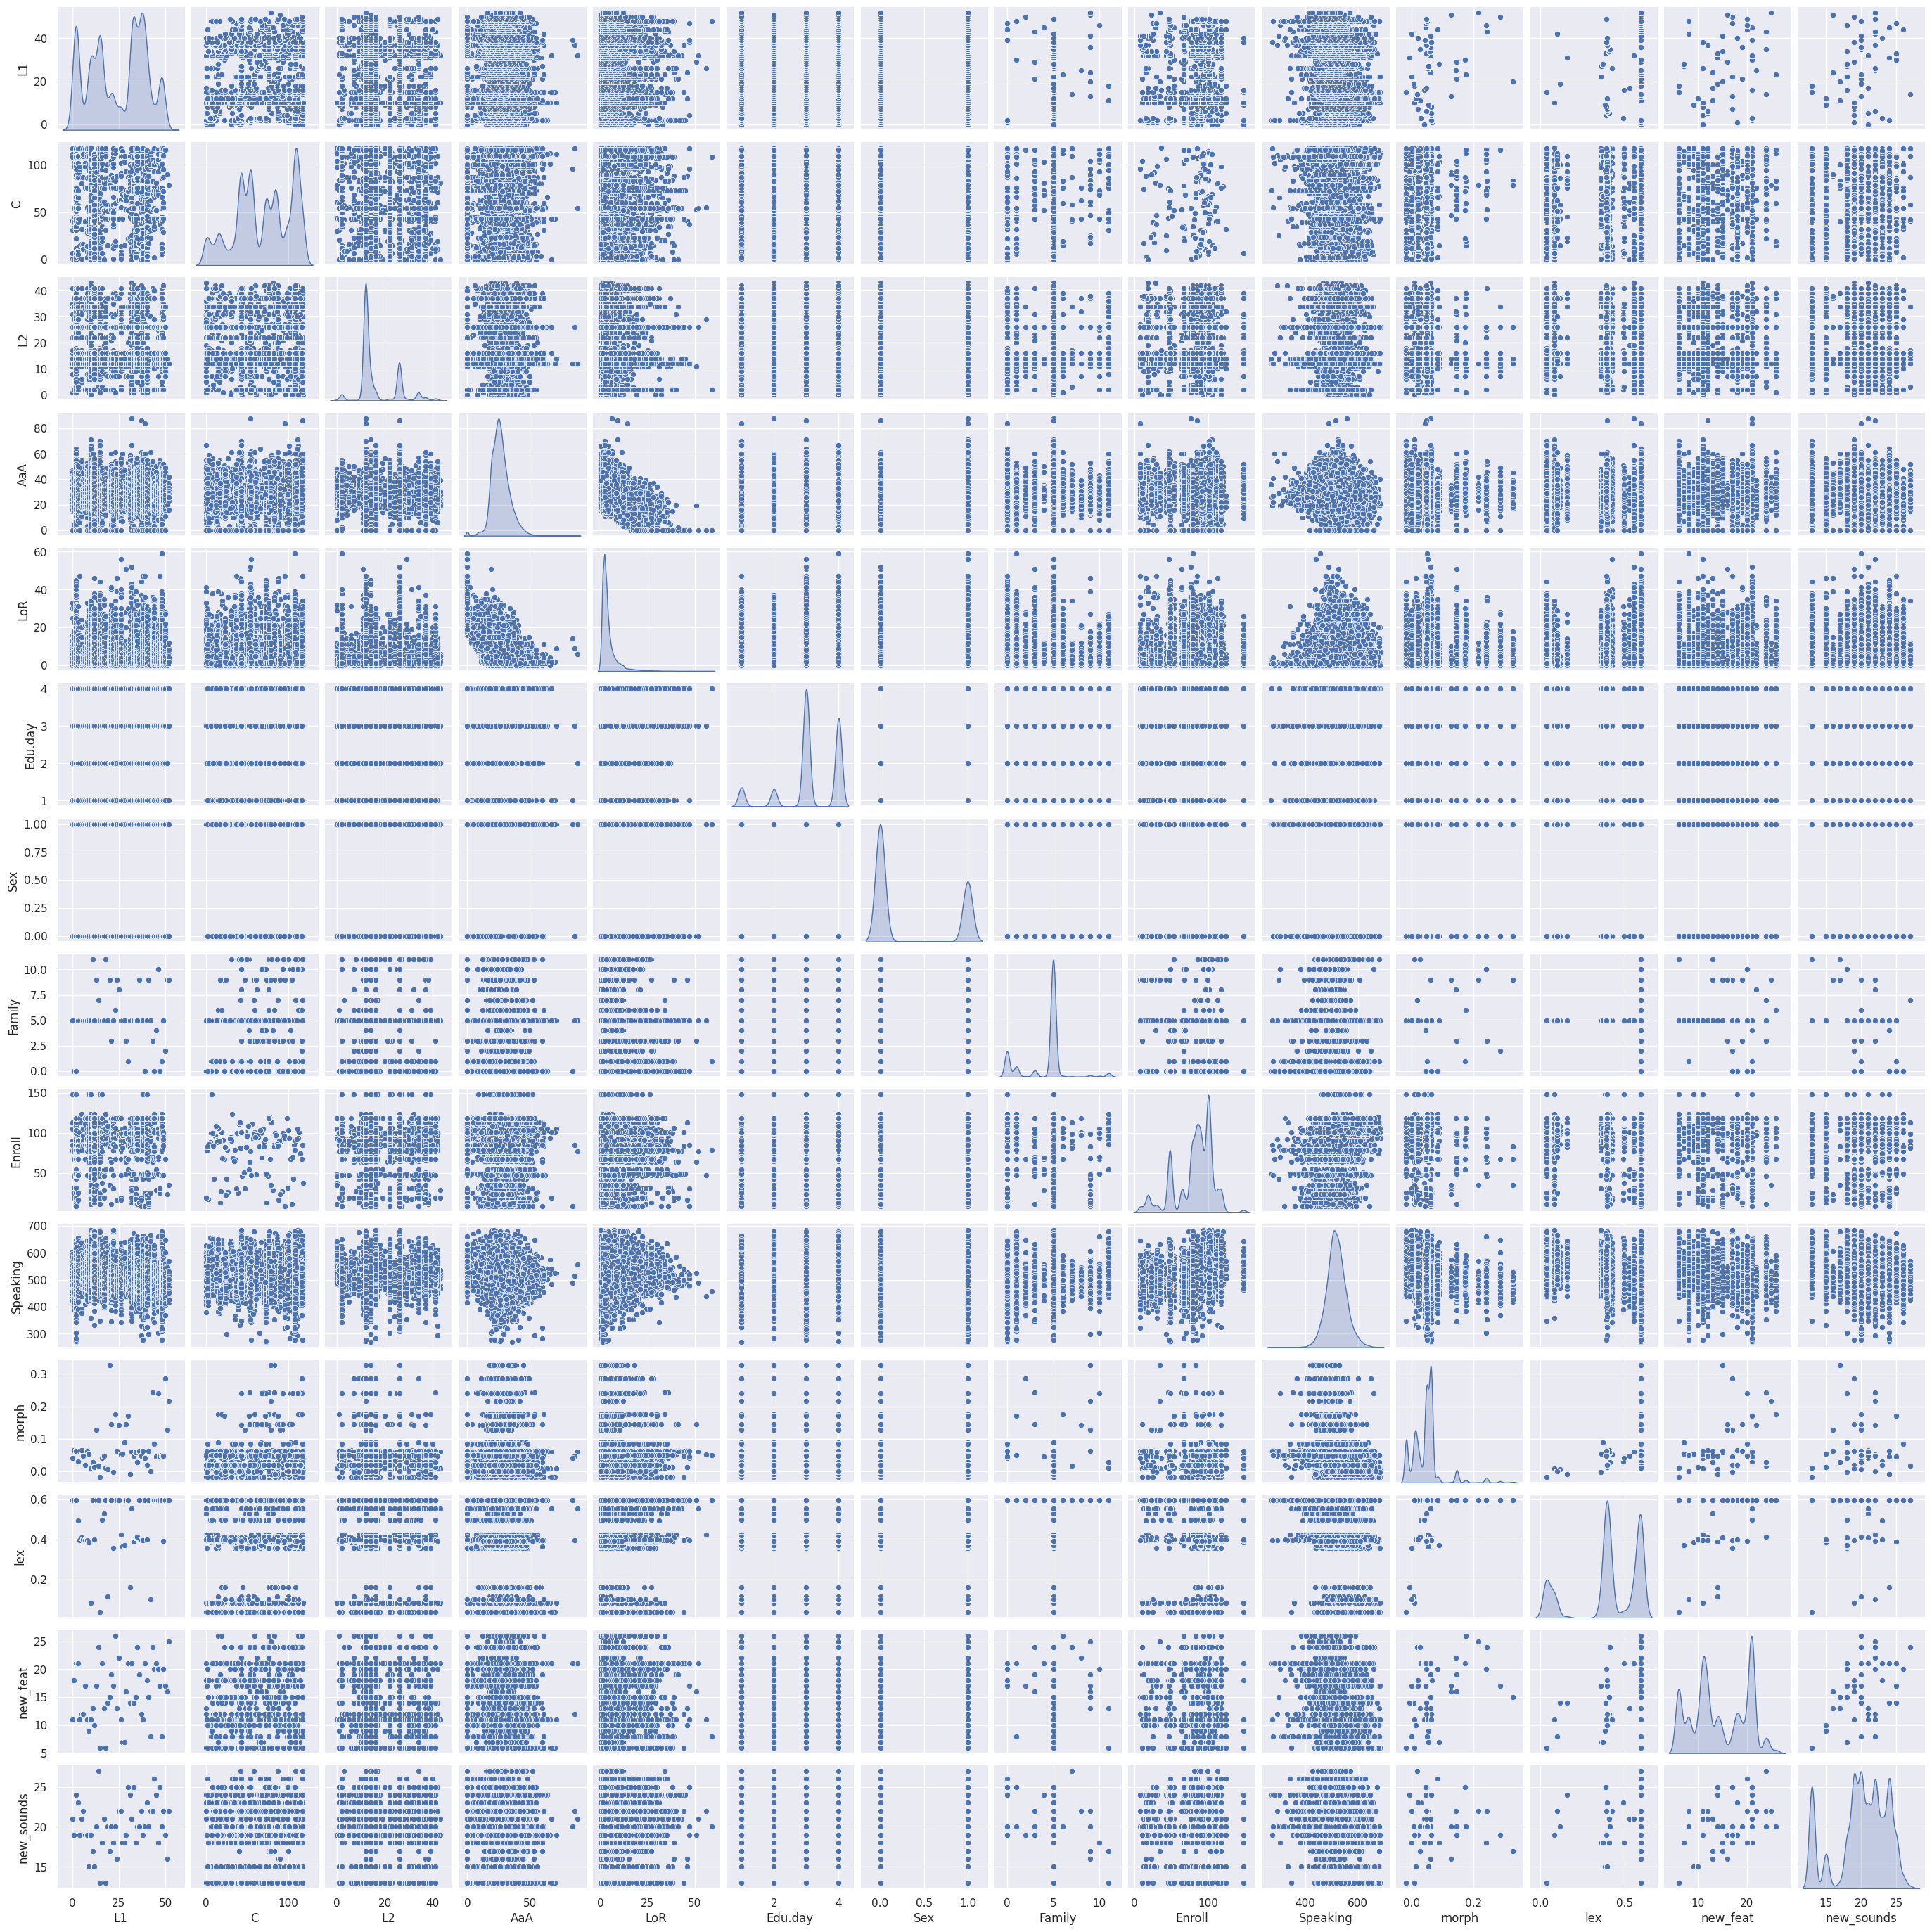

In [97]:
sns.set()
sns.pairplot(df,size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Видим, что нормальное распределение имеет только оценка качества говорения.

##Проверка гипотез по качеству говорения

$H_0$: пол не влияет на качество говорения при изучении нового языка;

$H_1$: пол влияет на качество говорения.

In [112]:
male = df[df.Sex == 'Male']['Speaking']
female = df[df.Sex == 'Female']['Speaking']
male

301      515
307      581
308      471
309      601
312      559
        ... 
50228    496
50229    428
50230    514
50233    426
50234    531
Name: Speaking, Length: 16008, dtype: int64

In [129]:
t_value, p_value = stats.ttest_ind(male,
                                   female)

print('Test statistic is %f' % float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f' % p_value)


Test statistic is -52.203923
p-value for two tailed test is 0.000000


Пусть уровень значимости - 5%. Тогда мы отклоняем нулевую гипотезу. Пол влияет на качество.

$H_0$: имеющийся опыт в изучении языка не влияет на качество говорения при изучении нового языка;

$H_1$: имеющийся опыт в изучении языка влияет на качество говорения.

In [114]:
monoling = df[df.L2 == 'Monolingual']['Speaking']
not_monoling = df[df.L2 != 'Monolingual']['Speaking']

In [123]:
t_value, p_value = stats.ttest_ind(monoling,
                                   not_monoling)

print('Test statistic is %f' % float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f' % p_value)

Test statistic is -20.089750
p-value for two tailed test is 0.000000


Пусть уровень значимости - 5%. Тогда мы отклоняем нулевую гипотезу. Если человек уже изучал язык, новый ему будет легче учить.

$H_0$: качество говорения при изучении нового языка совпадает у тех кто учился мало и учился много;

$H_1$: качество говорения при изучении нового языка не совпадает у тех кто учился мало и учился много.

In [142]:
df.Enroll.median()

86.0

In [149]:
less_enroll = df[df.Enroll <= 86]['Speaking']
high_enroll = df[df.Enroll > 86]['Speaking']

In [156]:
t_value, p_value = stats.ttest_ind(less_enroll,
                                   high_enroll)

print('Test statistic is %f' % float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f' % p_value)

Test statistic is -92.605188
p-value for two tailed test is 0.000000


Пусть уровень значимости - 5%. Тогда мы отклоняем нулевую гипотезу. Чем больше человек учится, тем лучше его результат.

$H_0$: время проживания не влияет на качество говорения;

$H_1$: время проживания влияет на качество говорения.

In [169]:
less_LoR = df[df.LoR <= 10 ]['Speaking']
high_LoR = df[(df.LoR > 10) & (df.LoR <= 11)]['Speaking']

In [170]:
t_value, p_value = stats.ttest_ind(less_LoR,
                                   high_LoR)

print('Test statistic is %f' % float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f' % p_value)

Test statistic is -3.433761
p-value for two tailed test is 0.000596


Пусть уровень значимости - 5%. Тогда мы отклоняем нулевую гипотезу. Чем проживает в стране, тем лучше его разговорные навыки.

H0 : возраст прибытия не влияет на качество говорения;

H1 : возраст прибытия влияет на качество говорения.

In [173]:
less_age = df[(df.AaA >= 50) & (df.AaA < 61)]['Speaking']
high_age = df[(df.AaA >= 10) & (df.AaA < 21)]['Speaking']

In [174]:
t_value, p_value = stats.ttest_ind(less_age,
                                   high_age)

print('Test statistic is %f' % float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f' % p_value)

Test statistic is -6.349253
p-value for two tailed test is 0.000000


Пусть уровень значимости - 5%. Тогда мы отклоняем нулевую гипотезу. Возраст прибытия влияет на изучение языка.

H0 : место рождения не влияет на качество говорения на новом языке;

H1 : место рождения влияет на качество говорения на новом языке.

In [177]:
african = df[df.C == 'SouthAfrica']['Speaking']
german = df[df.C == 'Germany']['Speaking']

In [178]:
t_value, p_value = stats.ttest_ind(african,
                                   german)

print('Test statistic is %f' % float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f' % p_value)

Test statistic is -4.973188
p-value for two tailed test is 0.000001


Пусть уровень значимости - 5%. Тогда мы отклоняем нулевую гипотезу. Схожесть языков, на которых разговаривают в разных странах, влияет на качество изучения нового языка.

#Выводы

Были проанализированы данные об изучении голландского языка, были получены следующие выводы:
1. Схожесть родного и голландского языка увеличивает качество разговорного навыка. Это логично, т к человек видит много схожего, что способствует более быстрому пониманию языка.
2. Безусловно, выделяемое на изучения время является одним из самых важных параметров.
3. Довольно интересный результат был получен для мужчин и женщин. Оказалось, что девушки приобретают более качественный разговорный навык, чем мужчины.
4. Время пребывания в Нидерландах также является важным параметром, т к разговорные навыки развиваются именно в процессе общения с носителями языка.
5. Молодым проще выучить новый язык, т к они быстрее адаптируются и схватывают новое. Взрослым на это требуется больше времени.